# Data Analysis

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Define some constant for plots

In [35]:
LANG="en_US.UTF-8"
LANGUAGE="en_US.UTF-8"
LC_ALL="en_US.UTF-8"

sns.set(font='Jetbrains Mono') # Set font


facecolor_reactive_local = [111/255, 178/255, 228/255, .85]
edgecolor_reactive_local = [111/255, 178/255, 228/255, 1.]
label_reactive_local = "Reactive Local Scaling"

facecolor_oracle_local = [150/255, 150/255, 188/255, .85]
edgecolor_oracle_local = [150/255, 150/255, 188/255, 1.]
label_oracle_local = "Oracle Local Scaling"

facecolor_reactive_global = [48/255, 112/255, 173/255, .85]
edgecolor_reactive_global = [48/255, 112/255, 173/255, 1.]
label_reactive_global = "Reactive Global Scaling"

facecolor_proactive_global = [221/255, 162/255, 55/255, .85]
edgecolor_proactive_global = [221/255, 162/255, 55/255, 1.]
label_proactive_global = "Proactive Global Scaling"

facecolor_hybrid = [204/255, 121/255, 167/255, .85]
edgecolor_hybrid = [204/255, 121/255, 167/255, 1.]
label_hybrid = "Proactive-Reactive Global Scaling"

facecolor_oracle = [.27, .61, .46, .85]
edgecolor_oracle = [70/255, 156/255, 118/255, 1.]
label_oracle_global = "Oracle Global Scaling"

facecolor_others = [213/255, 94/255, 0., .85]
edgecolor_others = [213/255, 94/255, 0., 1.]
label_others = "Urgaonkar et al."

## Reactive Local vs Reactive Global Enron

In [36]:
data_folder = 'data/'

data_files = ['reactive-local/run', 'reactive-global/run']

target_cols = ['Latency (ms)', 'Deployed instances', 'Message Loss']
target_labels = ['Latency (milliseconds)', 'Deployed Microservices', 'Message Loss']
save_labels = ['latency', 'deployed_instaces', 'loss']
steps = [50, 10, 200]
run = 25

    Time (ms)  Latency (ms)  Measured Workload  Completed msgs  Message Loss  \
0           0      0.000000                0.0        0.000000      0.000000   
1          10    150.395833               15.2      160.000000      0.000000   
2          20    243.514045               41.7      395.555556      0.000000   
3          30    689.048828              198.6      568.888889      0.000000   
4          40   2591.251913              591.3     1392.735194    670.317895   
5          50   2357.979355              539.0     1998.505778   4364.735389   
6          60   1964.947718              593.0     1738.564681   5352.286193   
7          70   1287.818715              741.6     2937.394000   4637.506872   
8          80    938.847599              729.3     5688.319333   1364.285274   
9          90    401.991010              597.9     6303.333333      0.000000   
10        100    248.800432              517.8     5144.444444      0.000000   
11        110    236.724102             

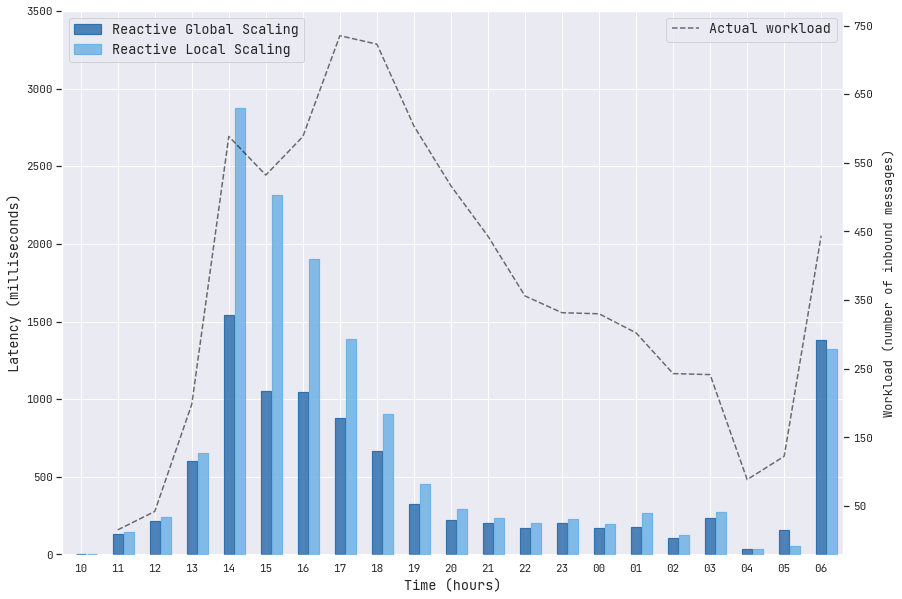

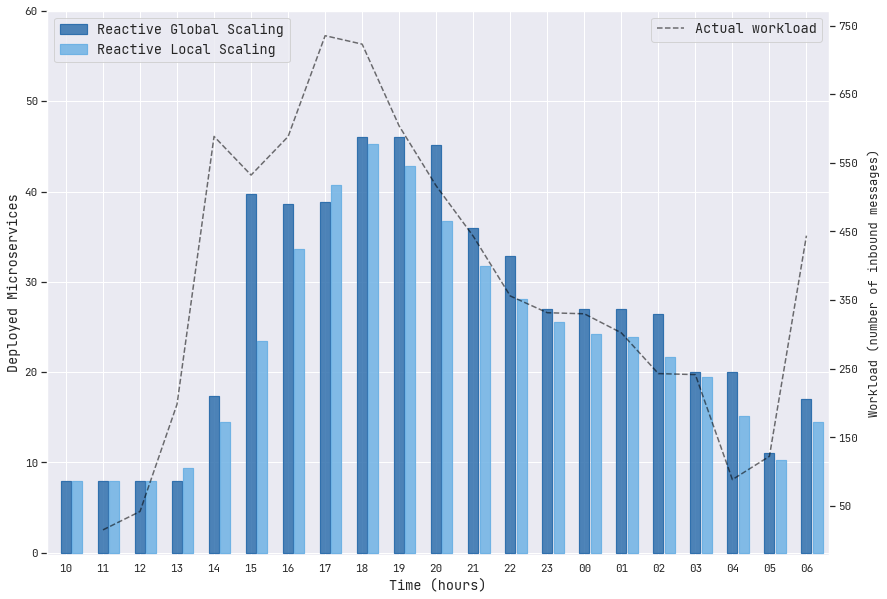

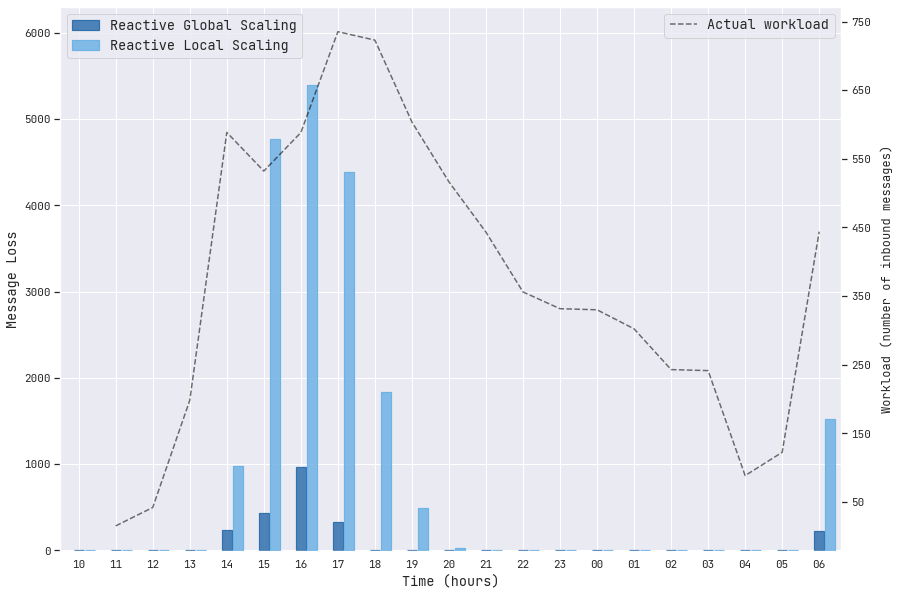

In [37]:
usecols_global = [0,1,3,7,9,13]
usecols_local = [0,1,3,7,9,11]

column_names = [
    "Time (ms)", 
    "Latency (ms)", 
    "Measured Workload",
    "Completed msgs",
    "Message Loss",
    "Deployed instances",
]
dfs = {}

for file in data_files:
    scenario = file.split('/')[0]
    if scenario == 'reactive-global': cols = usecols_global
    else: cols = usecols_local
    dfs[scenario] = []
    for i in range(1, run + 1):
        df = pd.read_csv(
                data_folder+file+str(i)+".txt", 
                delim_whitespace=True,
                usecols=cols,
                names=column_names,
                skiprows=[])
        dfs[scenario] += [df]
        
sum_reactive_global = pd.concat(dfs["reactive-global"]).groupby(level=0).mean()
sum_reactive_local = pd.concat(dfs["reactive-local"]).groupby(level=0).mean()


for target_col, target_label, save_label, step in zip(target_cols, target_labels, save_labels, steps):
    x = sum_reactive_global['Time (ms)']
    y_msgs = sum_reactive_global['Measured Workload']
    y_global = sum_reactive_global[target_col]
    y_local = sum_reactive_local[target_col]
    fig = plt.figure(figsize=[14,10])
    ax = plt.subplot(111)
    ax_background = ax.twinx()

    width = 2.7

    if save_label == 'latency':
        up = 3500
        down = -1
    elif save_label == 'deployed_instaces':
        up = 60
        down = -.2
    else:
        up = 6300
        down = -1


    # define plots
    g = ax.bar(
        x, 
        y_global, 
        linestyle='solid', 
        facecolor=facecolor_reactive_global,
        edgecolor=edgecolor_reactive_global,
        linewidth=1.2,
        label=label_reactive_global,
        zorder=1,
        width=width,
    )
    l = ax.bar(
        x+width+0.35, 
        y_local, 
        linestyle='solid', 
        facecolor=facecolor_reactive_local,
        edgecolor=edgecolor_reactive_local,
        linewidth=1.2,
        label=label_reactive_local, 
        zorder=100,
        width=width,
    )


    # define background plot
    arrived_msgs = ax_background.plot(x[1:], y_msgs[1:], linestyle='dashed', label='Actual workload', color='black', zorder=1000, alpha=.55)

    # set axis limits
    ax.set_yscale('linear')
    ax.set_xlim(-5, 206)
    ax.set_ylim(down, up)

    # set ticks and labels
    ax.set_ylabel(target_label, fontsize=13.5)
    ax.set_xlabel('Time (hours)', fontsize=13.5)
    ax.set_xticks(range(0, 210, 10))
    ax.set_xticklabels(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06'])

    # background ticks and labels
    ax_background.set_yticks(range(50, 800, 100))
    ax_background.grid(False)
    ax_background.yaxis.set_label_coords(1.05, 0.5)
    ax_background.set_ylabel('Workload (number of inbound messages)')

    # legend settings
    ax.legend(loc='upper left', ncol=1, frameon=True, fontsize=13.5)
    ax_background.legend(loc='upper right', ncol=1, frameon=True, fontsize=13.5)

    fig.savefig(f'./images/local_vs_global/{save_label}_reactiveL_vs_reactiveG.pdf', dpi=300, format='pdf', bbox_inches='tight')

    

## Oracle Local vs Reactive Global Scaling Enron

In [38]:
data_folder = 'data/'
data_files = ['oracle-local/run', 'reactive-global/run']

target_cols = ['Latency (ms)', 'Deployed instances', 'Message Loss']
target_labels = ['Latency (milliseconds)', 'Deployed Microservices', 'Message Loss']
save_labels = ['latency', 'deployed_instaces', 'loss']
steps = [50, 10, 200]
run = 25

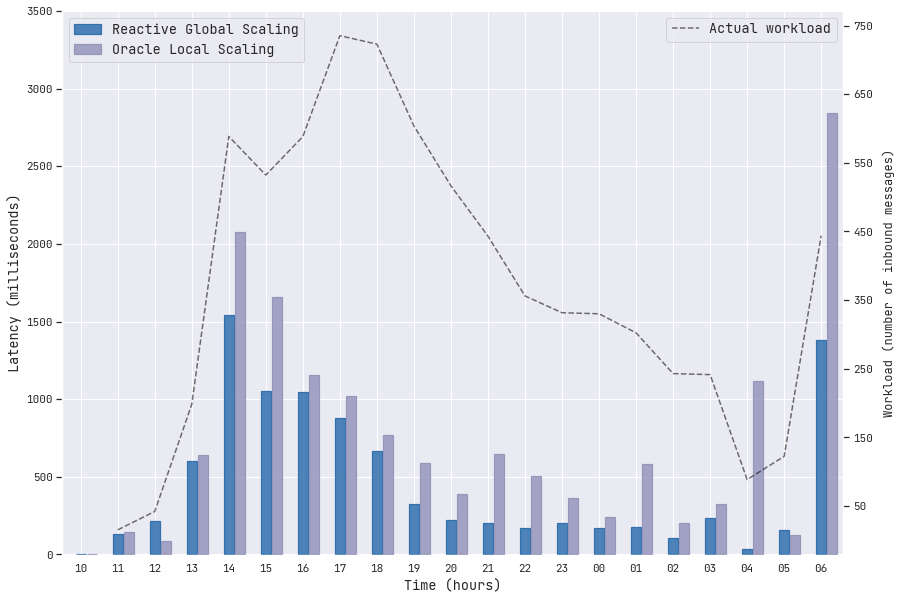

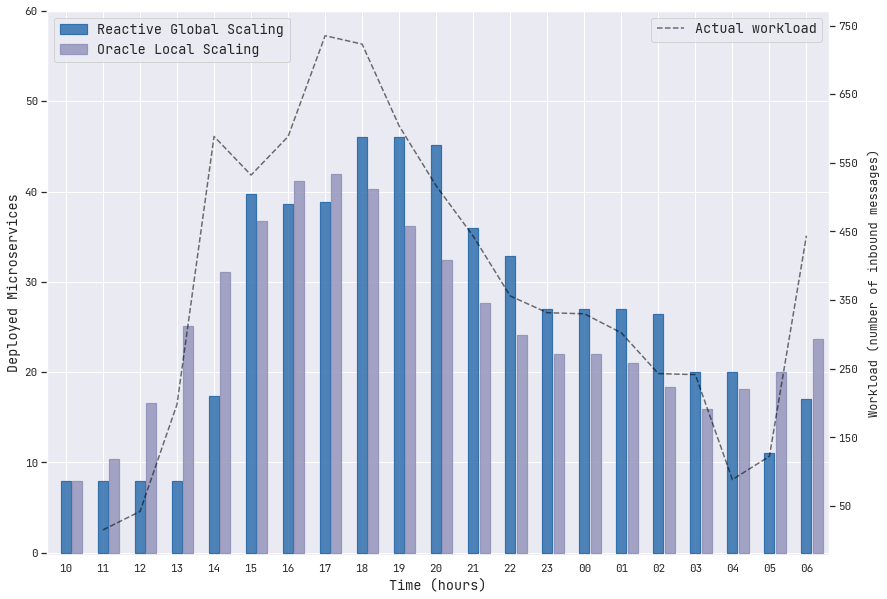

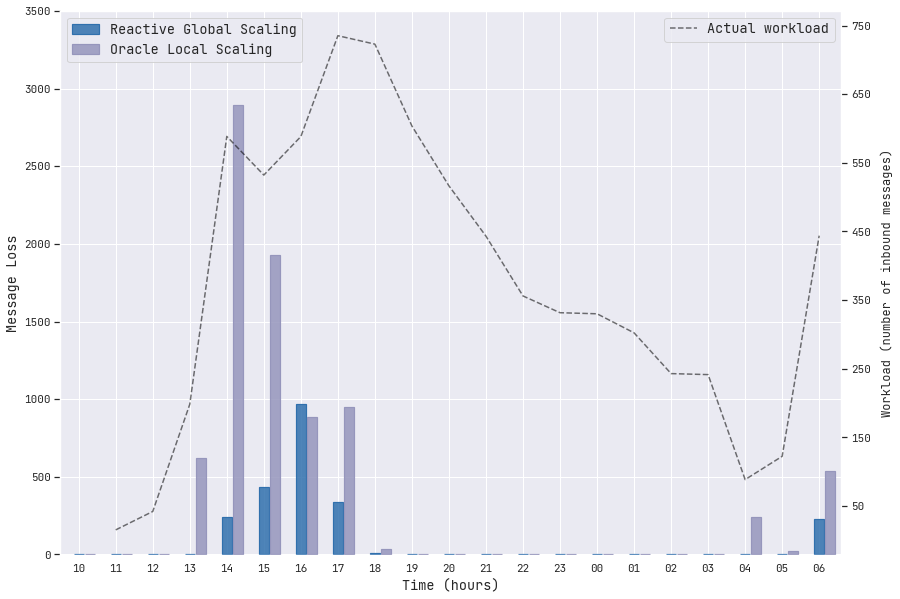

In [39]:
usecols_global = [0,1,3,7,9,13]
usecols_local = [0,1,3,7,9,11]

column_names = [
    "Time (ms)", 
    "Latency (ms)", 
    "Measured Workload",
    "Completed msgs",
    "Message Loss",
    "Deployed instances",
]

dfs = {}
for file in data_files:
    scenario = file.split('/')[0]
    if scenario == 'reactive-global': cols = usecols_global
    else: cols = usecols_local
    dfs[scenario] = []
    for i in range(1, run + 1):
        df = pd.read_csv(
                data_folder+file+str(i)+".txt", 
                delim_whitespace=True,
                usecols=cols,
                names=column_names,
                skiprows=[])
        dfs[scenario] += [df]
        

sum_reactive_global = pd.concat(dfs["reactive-global"]).groupby(level=0).mean()
sum_oracle_local = pd.concat(dfs["oracle-local"]).groupby(level=0).mean()

for target_col, target_label, save_label, step in zip(target_cols, target_labels, save_labels, steps):
    x = sum_reactive_global['Time (ms)']
    y_msgs = sum_reactive_global['Measured Workload']
    y_global = sum_reactive_global[target_col]
    y_local = sum_oracle_local[target_col]
    fig = plt.figure(figsize=[14,10])
    ax = plt.subplot(111)
    ax_background = ax.twinx()

    
    width = 2.7

    if save_label == 'latency':
        up = 3500
        down = -1
    elif save_label == 'deployed_instaces':
        up = 60
        down = -.2
    else:
        up = 3500
        down = -1


    # define plots
    g = ax.bar(
        x, 
        y_global, 
        linestyle='solid', 
        facecolor=facecolor_reactive_global,
        edgecolor=edgecolor_reactive_global,
        linewidth=1.2,
        label=label_reactive_global,
        zorder=1,
        width=width,
    )
    l = ax.bar(
        x+width+0.35, 
        y_local, 
        linestyle='solid', 
        facecolor=facecolor_oracle_local,
        edgecolor=edgecolor_oracle_local,
        linewidth=1.2,
        label=label_oracle_local, 
        zorder=100,
        width=width,
    )


    # define background plot
    arrived_msgs = ax_background.plot(x[1:], y_msgs[1:], linestyle='dashed', label='Actual workload', color='black', zorder=1000, alpha=.55)

    # set axis limits
    ax.set_yscale('linear')
    ax.set_xlim(-5, 206)
    ax.set_ylim(down, up)

    # set ticks and labels
    ax.set_ylabel(target_label, fontsize=13.5)
    ax.set_xlabel('Time (hours)', fontsize=13.5)
    ax.set_xticks(range(0, 210, 10))
    ax.set_xticklabels(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06'])

    # background ticks and labels
    ax_background.set_yticks(range(50, 800, 100))
    ax_background.grid(False)
    ax_background.yaxis.set_label_coords(1.05, 0.5)
    ax_background.set_ylabel('Workload (number of inbound messages)')

    # legend settings
    ax.legend(loc='upper left', ncol=1, frameon=True, fontsize=13.5)
    ax_background.legend(loc='upper right', ncol=1, frameon=True, fontsize=13.5)

    fig.savefig(f'./images/local_vs_global/oracle_reactive_enron/{save_label}_oracleReactiveL_vs_reactiveG.pdf', dpi=300, format='pdf', bbox_inches='tight')



In [40]:
area_glob = np.trapz(sum_reactive_global['Latency (ms)'], dx=5)
print("area glob =", area_glob)
area_local = np.trapz(y_local, dx=5)
print("area local =", area_local)

area glob = 44082.352849827395
area local = 39244.949127298474


## Reactive Global vs Proactive Global vs Oracle Global Enron

In [65]:
data_folder = 'data/'
data_files = ['reactive-global/run', 'proactive-global/run']#, 'oracle-global/run']

target_cols = ['Latency (ms)', 'Deployed instances', 'Message Loss']
target_labels = ['Latency (milliseconds)', 'Deployed Microservices', 'Message Loss']
save_labels = ['latency', 'deployed_instaces', 'loss']
steps = [50, 10, 200, .01]
run = 25

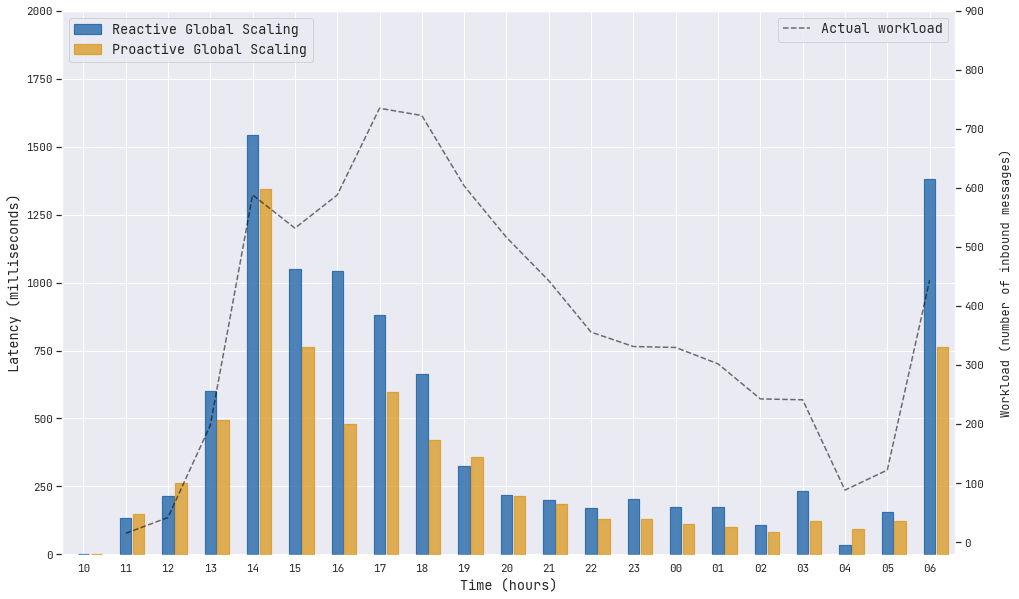

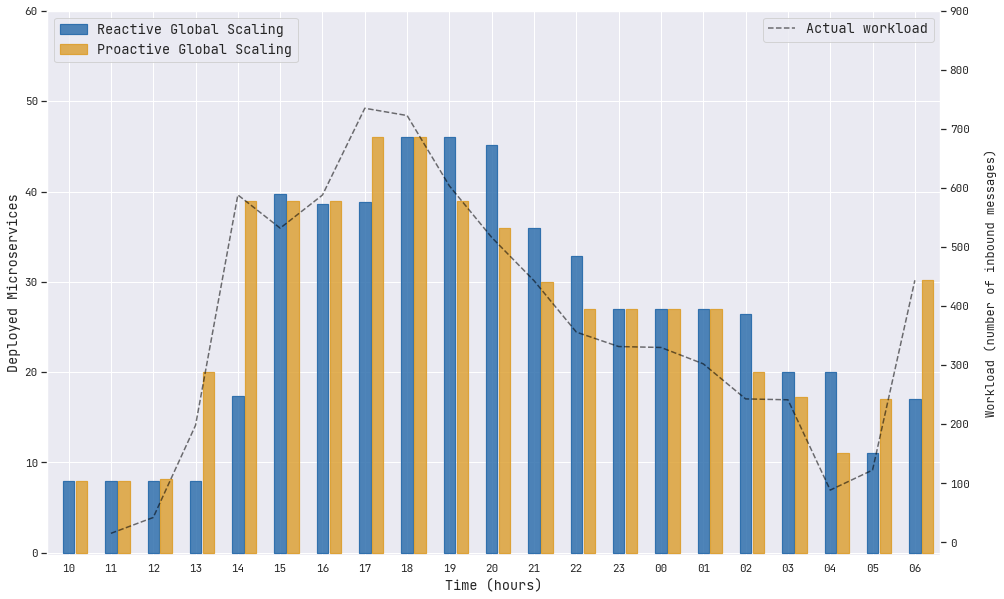

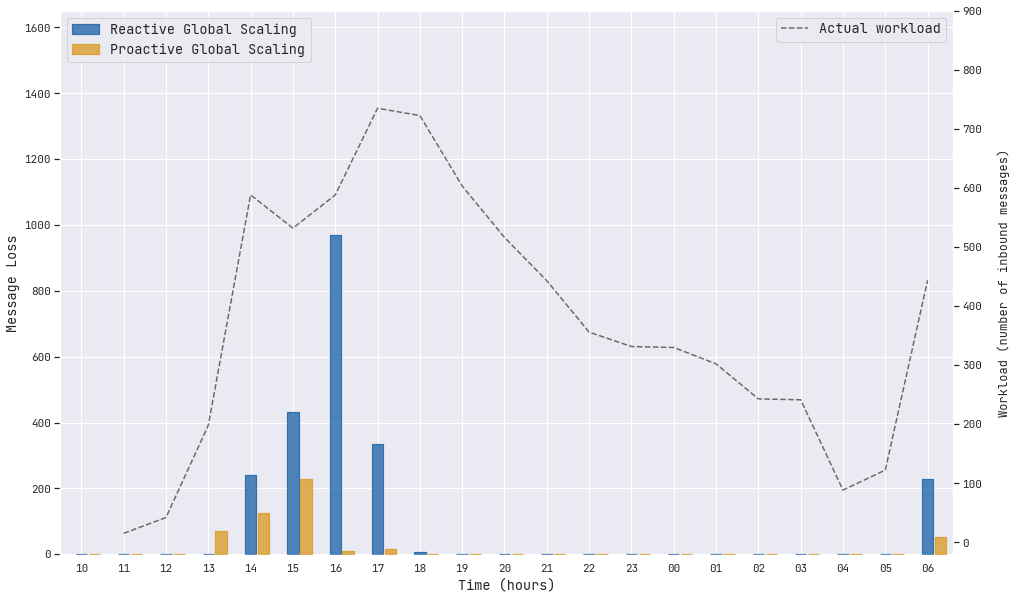

In [69]:
usecols_oracle = [0,1,5,9,11,13,15]
usecols_reactive = [0,1,3,7,9,11,13]
usecols_proactive = [0,1,3,9,11,13,15]

column_names = [
    "Time (ms)", #x
    "Latency (ms)", #x
    "Measured Workload",#x
    "Completed msgs",#x
    "Message Loss", #
    "Supported msgs",#x
    "Deployed instances",
]

dfs = {}

for file in data_files:
    scenario = file.split('/')[0]
    
    if scenario == 'reactive-global': cols = usecols_reactive
    elif scenario == 'oracle-global': cols = usecols_oracle
    else: cols = usecols_proactive
    dfs[scenario] = []
    for i in range(1, run + 1):
        df = pd.read_csv(
                data_folder+file+str(i)+".txt", 
                delim_whitespace=True,
                usecols=cols,
                names=column_names,
                skiprows=[])
        dfs[scenario] += [df]

reactive_global = pd.concat(dfs["reactive-global"]).groupby(level=0).mean()
proactive_global = pd.concat(dfs["proactive-global"]).groupby(level=0).mean()
#oracle_global = pd.concat(dfs["oracle-global"]).groupby(level=0).mean()

for target_col, target_label, save_label, step in zip(target_cols, target_labels, save_labels, steps):
    x = reactive_global['Time (ms)']
    y_msgs = reactive_global['Measured Workload']
    y_pred = proactive_global['Measured Workload']
    y_global = reactive_global[target_col]
    y_proactive = proactive_global[target_col]
    #y_oracle = oracle_global[target_col]
    fig = plt.figure(figsize=[16,10])
    ax = plt.subplot(111)
    ax_background = ax.twinx()

    width = 2.7

    if save_label == 'latency':
        up = 2000
        down = -1
    elif save_label == 'deployed_instaces':
        up = 60
        down = -.2
    else:
        up = 1650
        down = -1

    # define plots
    g = ax.bar(
        x, 
        y_global, 
        linestyle='solid', 
        facecolor=facecolor_reactive_global,
        edgecolor=edgecolor_reactive_global,
        linewidth=1.2,
        label=label_reactive_global,
        zorder=1,
        width=width,
    )

    p = ax.bar(
        x+width+0.35, 
        y_proactive, 
        linestyle='solid', 
        facecolor=facecolor_proactive_global,
        edgecolor=edgecolor_proactive_global,
        linewidth=1.2,
        label=label_proactive_global, 
        zorder=10,
        width=width,
    )
    
    #o = ax.bar(
    #    x-width-0.35, 
    #    y_oracle, 
    #    linestyle='solid',
    #    facecolor=facecolor_oracle,
    #    edgecolor=edgecolor_oracle,
    #    linewidth=1.2,
    #    label=label_oracle_global, 
    #    zorder=10,
    #    width=width,
    #)



    # define background plot
    arrived_msgs = ax_background.plot(x[1:], y_msgs[1:], linestyle='dashed', label='Actual workload', color='black', zorder=1000, alpha=.55)
    #predicted_msgs = ax_background.plot(x[1:], y_pred[0:-1], linestyle='dashed', label='Predicted workload', color='red', zorder=1000, alpha=.55)

    # set axis limits
    ax.set_yscale('linear')
    ax.set_xlim(-5, 206)
    ax.set_ylim(down, up)

    # set ticks and labels
    ax.set_ylabel(target_label, fontsize=13.5)
    ax.set_xlabel('Time (hours)', fontsize=13.5)
    ax.set_xticks(range(0, 210, 10))
    ax.set_xticklabels(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06'])

    # background ticks and labels
    ax_background.set_yticks(range(0, 1000, 100))
    ax_background.grid(False)
    ax_background.yaxis.set_label_coords(1.05, 0.5)
    ax_background.set_ylabel('Workload (number of inbound messages)')

    # legend settings
    ax.legend(loc='upper left', ncol=1, frameon=True, fontsize=13.5)
    ax_background.legend(loc='upper right', ncol=1, frameon=True, fontsize=13.5)

    fig.savefig(f'./images/reactive_vs_proactive_global_enron/{save_label}_enron_reactiveG_vs_proactiveG.pdf', dpi=300, format='pdf', bbox_inches='tight')




## Proactive Global vs Proactive-Reactive Global Outliers

In [45]:
data_folder = 'data/'
data_files = ['proactive-reactive-global-outliers/run', 'proactive-global-outliers/run', 'oracle-global-outliers/run']

target_cols = ['Latency (ms)', 'Deployed instances', 'Message Loss']
target_labels = ['Latency (milliseconds)', 'Deployed Microservices', 'Message Loss']
save_labels = ['latency', 'deployed_instaces', 'loss']
steps = [50, 10, 200, .01]
run = 25

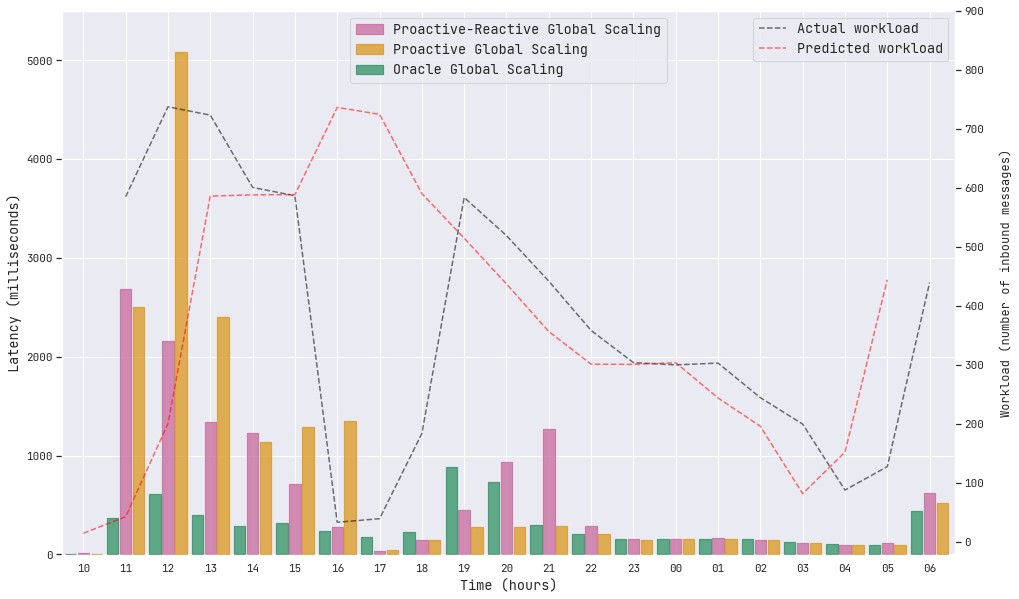

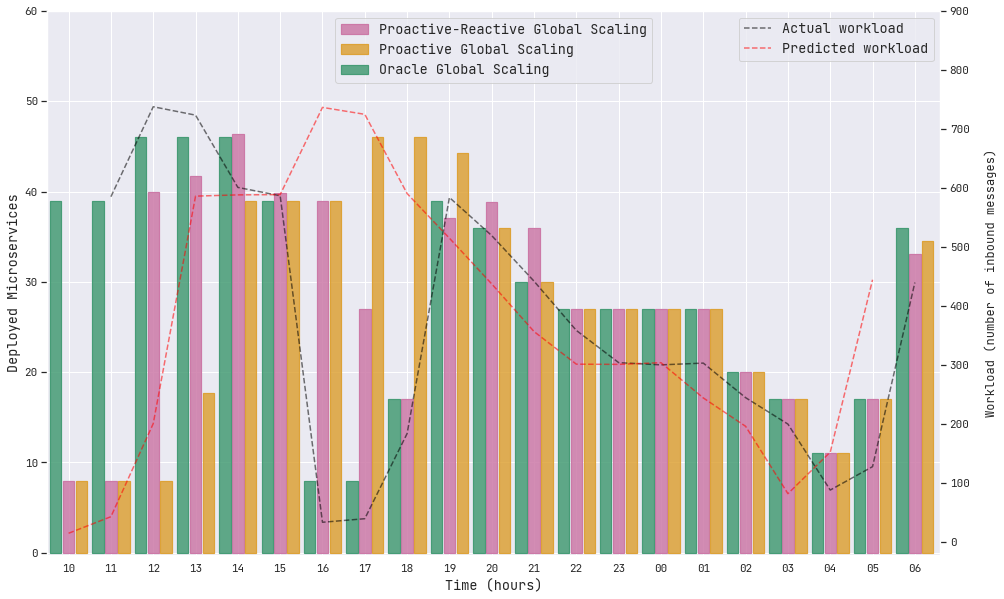

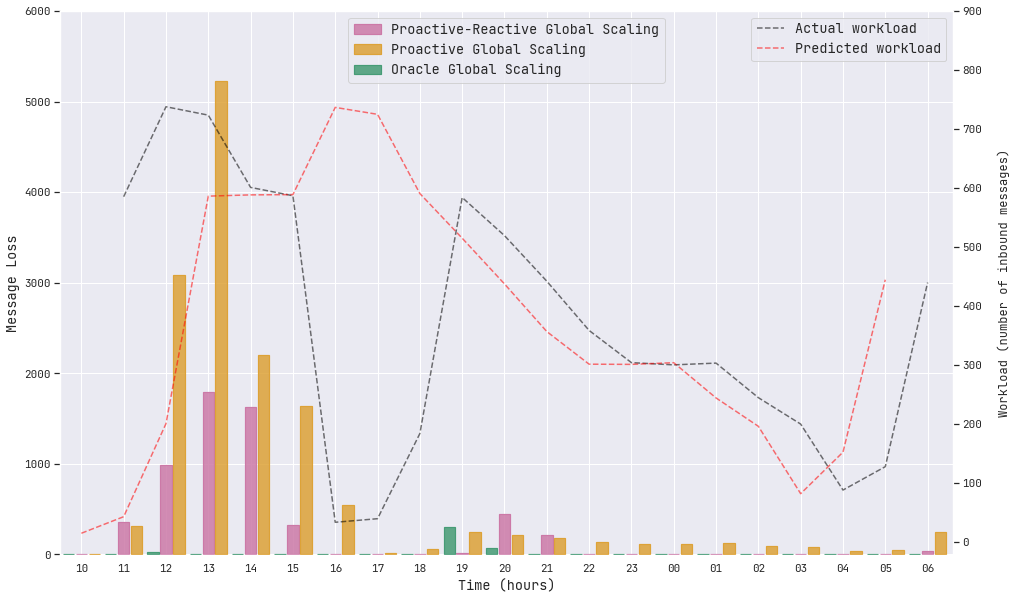

In [46]:
usecols_oracle = [0,1,5,9,11,13,15]
usecols_proactive_reactive = [0,1,7,11,13,15,17]
usecols_proactive = [0,1,3,9,11,13,15]

column_names = [
    "Time (ms)",
    "Latency (ms)",
    "Measured Workload",
    "Completed msgs",
    "Message Loss",
    "Supported msgs",
    "Deployed instances",
]

dfs = {}
for file in data_files:
    scenario = file.split('/')[0]
    if scenario == 'proactive-reactive-global-outliers': cols = usecols_proactive_reactive
    elif scenario == 'oracle-global-outliers': cols = usecols_oracle
    else: cols = usecols_proactive
    dfs[scenario] = []
    for i in range(1, run + 1):
        df = pd.read_csv(
                data_folder+file+str(i)+".txt", 
                delim_whitespace=True,
                usecols=cols,
                names=column_names,
                skiprows=[])
        dfs[scenario] += [df]

proactive_reactive_global = pd.concat(dfs["proactive-reactive-global-outliers"]).groupby(level=0).mean()
proactive_global = pd.concat(dfs["proactive-global-outliers"]).groupby(level=0).mean()
oracle_global = pd.concat(dfs["oracle-global-outliers"]).groupby(level=0).mean()

for target_col, target_label, save_label, step in zip(target_cols, target_labels, save_labels, steps):
    x = oracle_global['Time (ms)']
    y_msgs = oracle_global['Measured Workload']
    y_pred = proactive_global['Measured Workload']
    y_global = proactive_reactive_global[target_col]
    y_proactive = proactive_global[target_col]
    y_oracle = oracle_global[target_col]
    fig = plt.figure(figsize=[16,10])
    ax = plt.subplot(111)
    ax_background = ax.twinx()

    width = 2.7

    if save_label == 'latency':
        up = 5500
        down = -1
    elif save_label == 'deployed_instaces':
        up = 60
        down = -.2
    elif save_label == 'cost':
        up = 0.08
        down = 0
    else:
        up = 6000
        down = -1



    # define plots
    pr = ax.bar(
        x, 
        y_global, 
        linestyle='solid', 
        facecolor=facecolor_hybrid,
        edgecolor=edgecolor_hybrid,
        linewidth=1.2,
        label=label_hybrid,
        zorder=1,
        width=width,
    )

    p = ax.bar(
        x+width+0.35, 
        y_proactive, 
        linestyle='solid', 
        facecolor=facecolor_proactive_global,
        edgecolor=edgecolor_proactive_global,
        linewidth=1.2,
        label=label_proactive_global, 
        zorder=10,
        width=width,
    )
    
    o = ax.bar(
        x-width-0.35, 
        y_oracle, 
        linestyle='solid',
        facecolor=facecolor_oracle,
        edgecolor=edgecolor_oracle,
        linewidth=1.2,
        label=label_oracle_global, 
        zorder=10,
        width=width,
    )


    # define background plot
    arrived_msgs = ax_background.plot(x[1:], y_msgs[1:], linestyle='dashed', label='Actual workload', color='black', zorder=1000, alpha=.55)
    predicted_msgs = ax_background.plot(x[0:-1], y_pred[0:-1], linestyle='dashed', label='Predicted workload', color='red', zorder=1000, alpha=.55)

    # set axis limits
    ax.set_yscale('linear')
    ax.set_xlim(-5, 206)
    ax.set_ylim(down, up)

    # set ticks and labels
    ax.set_ylabel(target_label, fontsize=13.5)
    ax.set_xlabel('Time (hours)', fontsize=13.5)
    ax.set_xticks(range(0, 210, 10))
    ax.set_xticklabels(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06'])

    # background ticks and labels
    ax_background.set_yticks(range(0, 1000, 100))
    ax_background.grid(False)
    ax_background.yaxis.set_label_coords(1.05, 0.5)
    ax_background.set_ylabel('Workload (number of inbound messages)')

    # legend settings
    ax.legend(loc='upper center', ncol=1, frameon=True, fontsize=13.5)
    ax_background.legend(loc='upper right', ncol=1, frameon=True, fontsize=13.5)

    fig.savefig(f'./images/proactive_reactive_vs_proactive_global_outliers/{save_label}_outliers_proactive_reactiveG_vs_proactiveG.pdf', dpi=300, format='pdf', bbox_inches='tight')